In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import math
import os

# PCA on two not yet cleaned images

In [2]:
# read images
img_grey_1 = cv2.imread('thermal_1579648028_0_0.png', cv2.IMREAD_GRAYSCALE)
img_grey_2 = cv2.imread('thermal_1597528867_0_0.png', cv2.IMREAD_GRAYSCALE)

# scaling between 0 and 1
img_df_1 = img_grey_1/255
img_df_2 = img_grey_2/255

In [3]:
# fit and transform data in pca

pca_1 = PCA(n_components=30)
pca_1.fit(img_df_1)
trans_pca_1 = pca_1.transform(img_df_1)
img_reduced_1 = pca_1.inverse_transform(trans_pca_1)

pca_2 = PCA(n_components=30)
pca_2.fit(img_df_2)
trans_pca_2 = pca_2.transform(img_df_2)
img_reduced_2 = pca_2.inverse_transform(trans_pca_2)

In [4]:
# new dimensions
[trans_pca_1.shape, trans_pca_2.shape]

[(512, 30), (512, 30)]

In [5]:
# explained variance ratio (want it close to 1)
print(f"Image 1 : {sum(pca_1.explained_variance_ratio_)}")
print(f"Image 2 : {sum(pca_2.explained_variance_ratio_)}")

Image 1 : 0.9651822220436179
Image 2 : 0.9808438114774456


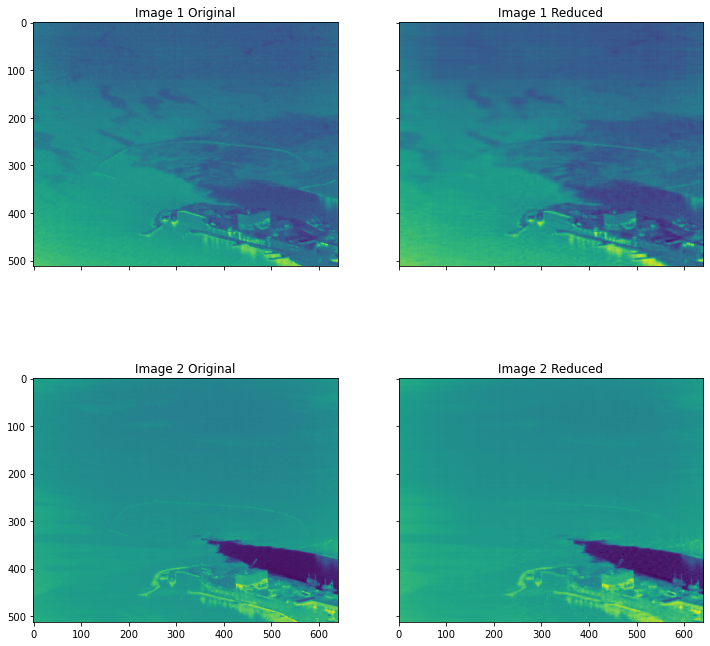

In [6]:
# plotting originals and reduced (inverse transform of the transformed image)

fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize = (12,12))
axs[0,0].imshow(img_grey_1)
axs[0,1].imshow(img_reduced_1)

axs[1,0].imshow(img_grey_2)
axs[1,1].imshow(img_reduced_2)

axs[0,0].set_title('Image 1 Original')
axs[0,1].set_title('Image 1 Reduced')
axs[1,0].set_title('Image 2 Original')
axs[1,1].set_title('Image 2 Reduced')

plt.show()

# PCA on 36 cropped, black and white images

In [7]:
# We import the data
data = []
folderSave = 'Image Classification/Save'
for filename in os.listdir(folderSave):
        img = cv2.imread(os.path.join(folderSave,filename), cv2.IMREAD_GRAYSCALE)
        data.append(img/255)
data = np.array(data)
data.shape

(36, 260, 370)

In [8]:
# loop through each image and transform it using PCA, store the transformed data and reduced images
transformed_data = []
reduced_imgs = []

pca = PCA(n_components=30)

for img in range(data.shape[0]):
    pca.fit(data[img])
    trans_pca = pca.transform(data[img])
    img_reduced = pca.inverse_transform(trans_pca)
    transformed_data.append(trans_pca)
    reduced_imgs.append(img_reduced)
    print(f"Image {img+1} : {sum(pca.explained_variance_ratio_)}")

reduced_imgs = np.array(reduced_imgs)
transformed_data = np.array(transformed_data)

Image 1 : 0.9694052834983746
Image 2 : 0.9252564213972339
Image 3 : 0.9817383461347758
Image 4 : 0.9318733219557087
Image 5 : 0.9805064466295613
Image 6 : 0.9755474795507628
Image 7 : 0.9291148190300103
Image 8 : 0.9839374508061833
Image 9 : 0.9766627539835854
Image 10 : 0.9849532127081031
Image 11 : 0.9226524893239261
Image 12 : 0.9482569071919575
Image 13 : 0.8782056754903254
Image 14 : 0.982259964842828
Image 15 : 0.9844135603942219
Image 16 : 0.8734716075668348
Image 17 : 0.9835826562552968
Image 18 : 0.9802555576090513
Image 19 : 0.9599508174543226
Image 20 : 0.8875215523822584
Image 21 : 0.7113045491742511
Image 22 : 0.9120893648769525
Image 23 : 0.8982841247030934
Image 24 : 0.9317342208511552
Image 25 : 0.9275937925358843
Image 26 : 0.8966641560839341
Image 27 : 0.8555999074421972
Image 28 : 0.85493274472354
Image 29 : 0.9687940593730616
Image 30 : 0.9781009591288659
Image 31 : 0.8197759699611703
Image 32 : 0.9583987569193839
Image 33 : 0.984180898637213
Image 34 : 0.9753194007

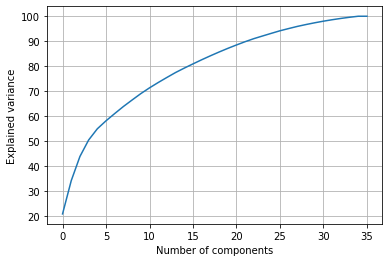

In [9]:
# doing PCA on full dataset instead of one image at a time
# need to use a lot more data for this to be good I think

temp_data = data.reshape(data.shape[0], data.shape[1]*data.shape[2])
num_comp = temp_data.shape[1]

pca_784 = PCA(n_components=36)
pca_784.fit(temp_data)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

# Clustering using k-means

In [10]:
# creating a dataset that will be used for clustering

cluster_data = transformed_data.reshape((transformed_data.shape[0], transformed_data.shape[1]*transformed_data.shape[2]))
np.random.seed(1)

n=4
kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(cluster_data)
Z = kmeans.predict(cluster_data)

cluster 0
3 elements


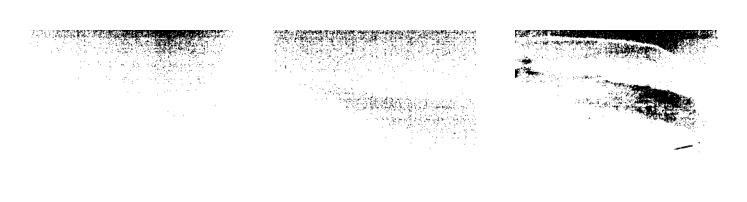

cluster 1
20 elements


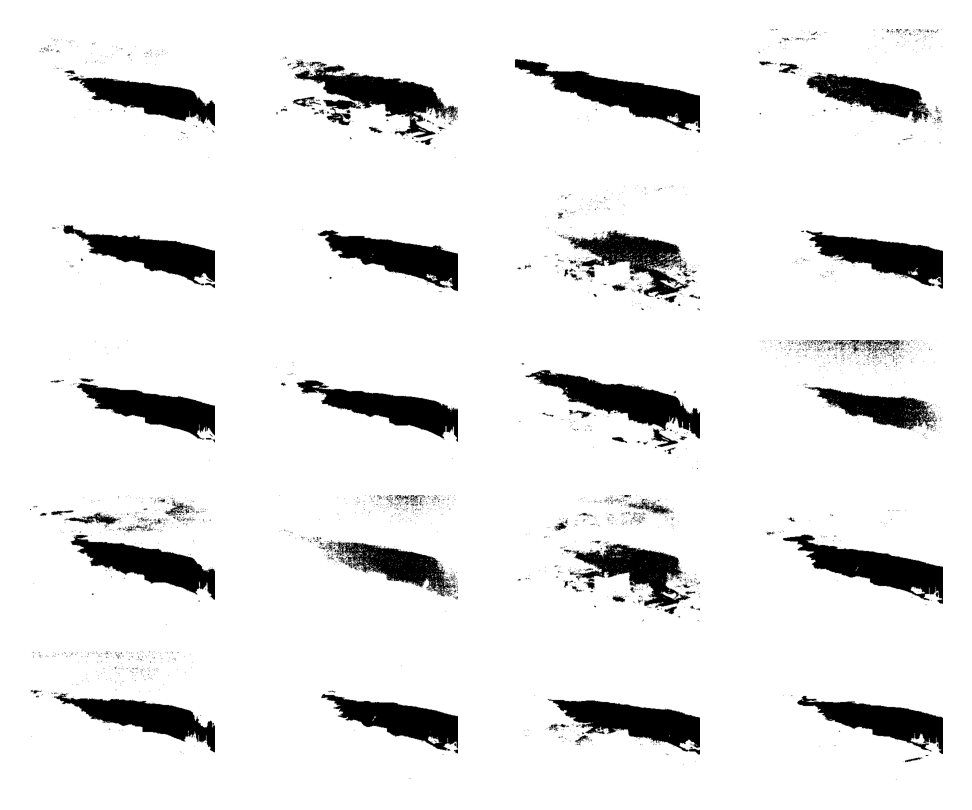

cluster 2
5 elements


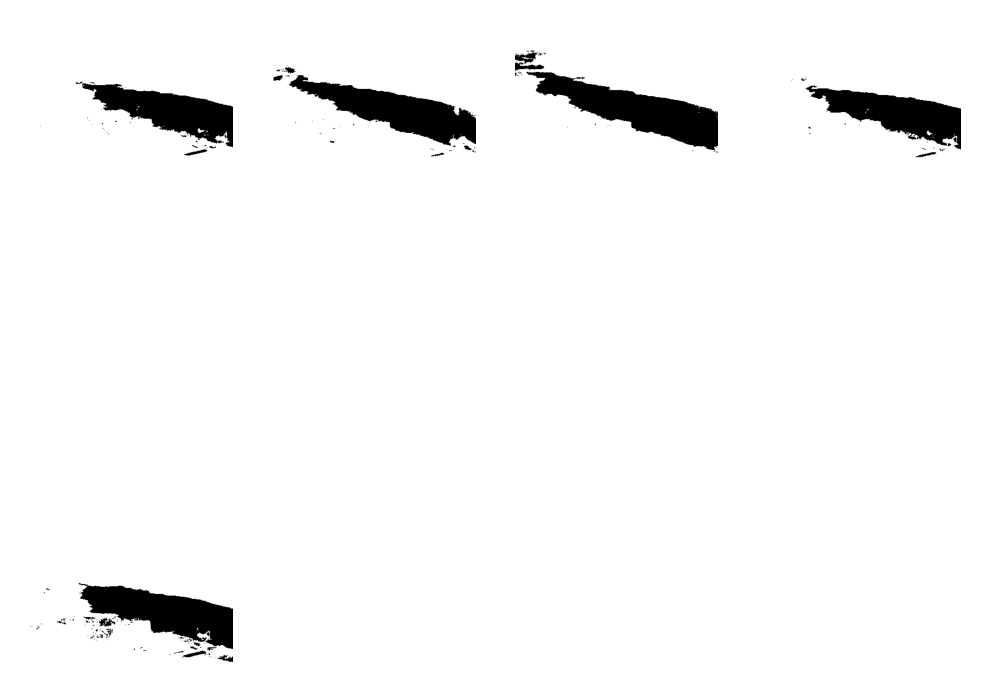

cluster 3
8 elements


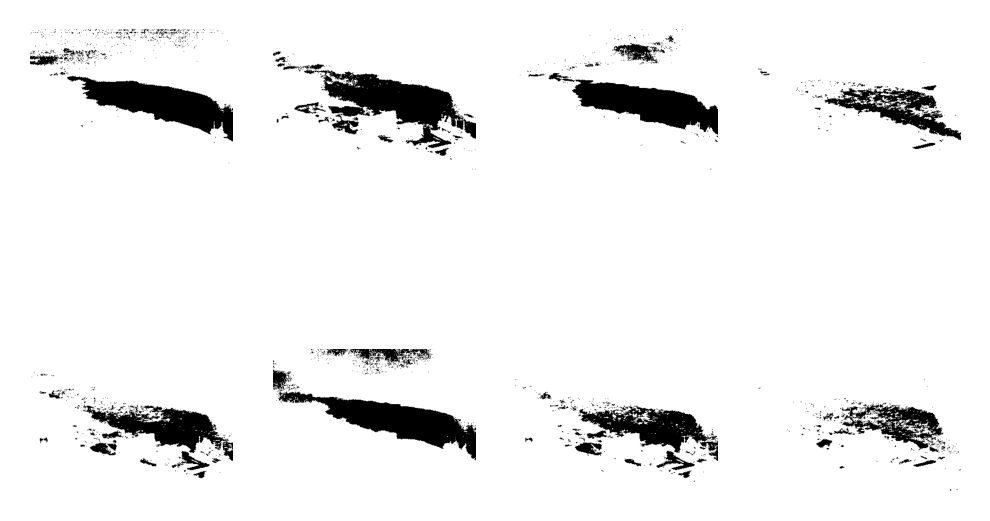

In [11]:
# We plot the resulting clusters
for i in range(0,n):
    
    row = np.where(Z==i)[0] # row in Z for elements of cluster i
    num = row.shape[0]      # number of elements for each cluster
    r = np.floor(num/4.)   # number of rows in the figure of the cluster
    
    print("cluster " + str(i))
    print(str(num) + " elements")
    
    plt.figure(figsize=(4,4), dpi=300)
    for k in range(0, num):
        plt.subplot(int(r+1), 4, k+1)
        image = data[row[k], ]
        #image = image.reshape(260, 370)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

In [12]:
cluster_data.shape

(36, 7800)

# Clustering using DBSCAN

In [13]:
# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14)

results = []
for i in range(0, len(eps_list)):
    eps = eps_list[i]
    labels = DBSCAN(eps=eps).fit_predict(cluster_data)
    results.append(labels)

In [14]:
results

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1